# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease **classification**.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


# Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('E:/zero to mastery/data/heart-disease.csv')
df.shape #rows and cols

(303, 14)

In [3]:
## Data exploration and becoming SME On dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#How many of each class are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

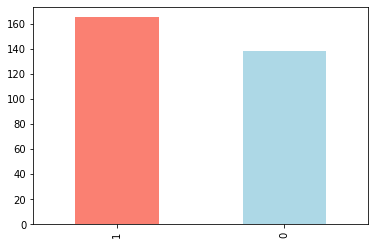

In [6]:
df['target'].value_counts().plot(kind = 'bar' , color = ['salmon' , 'lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
### heart disease frequency according to sex

df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target col with sex
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

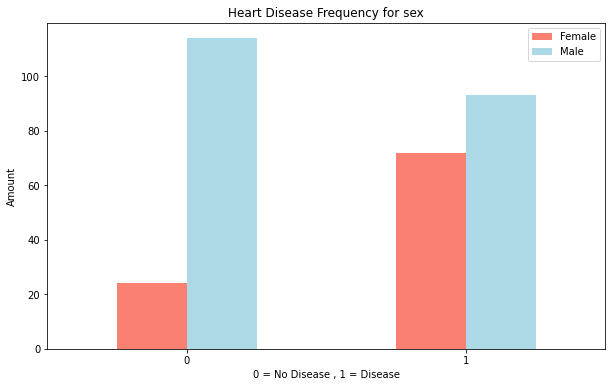

In [12]:
# Create a plot of cross tab
pd.crosstab(df.target , df.sex).plot(kind='bar',
                                    figsize = (10,6),
                                    color=['salmon' , 'lightblue'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease , 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female' , 'Male']);
plt.xticks(rotation = 0)
           

## Age vs Max heart rate for heart disease

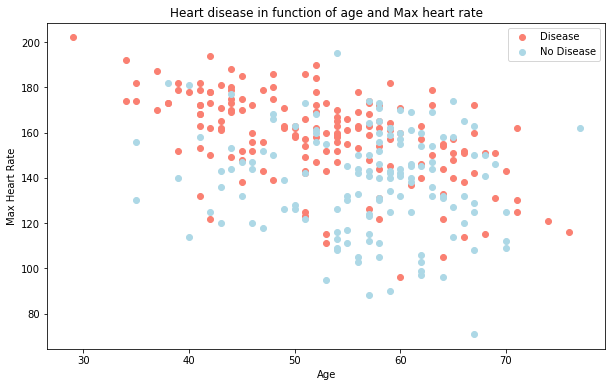

In [13]:
# crate another figure

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c = "salmon")

## Scatter with positive examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c = "lightblue")

# Add some help or info
plt.title('Heart disease in function of age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease' , 'No Disease']);

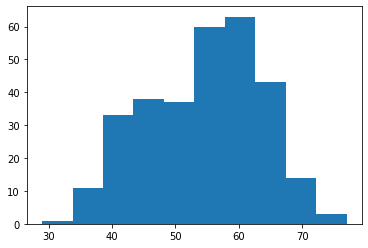

In [14]:
# CHeck the distribution of the age column wiht a histogram
df.age.hist(grid=False);

## Heart disease frequency per chest pain type
cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


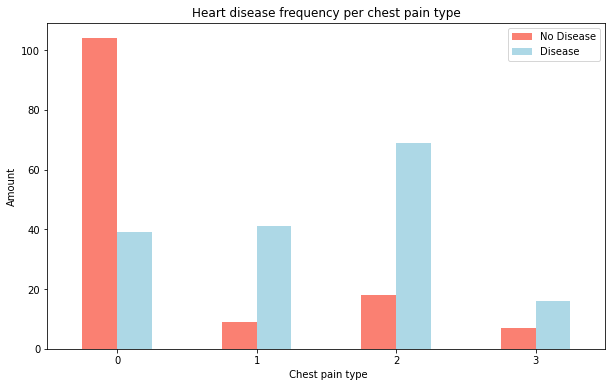

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp , df.target).plot(kind='bar',
                                   figsize = (10,6),
                                   color = ['salmon' , ['lightblue']])

plt.title('Heart disease frequency per chest pain type')
plt.xlabel(' Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease' , 'Disease'])
plt.xticks(rotation=0);

In [17]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


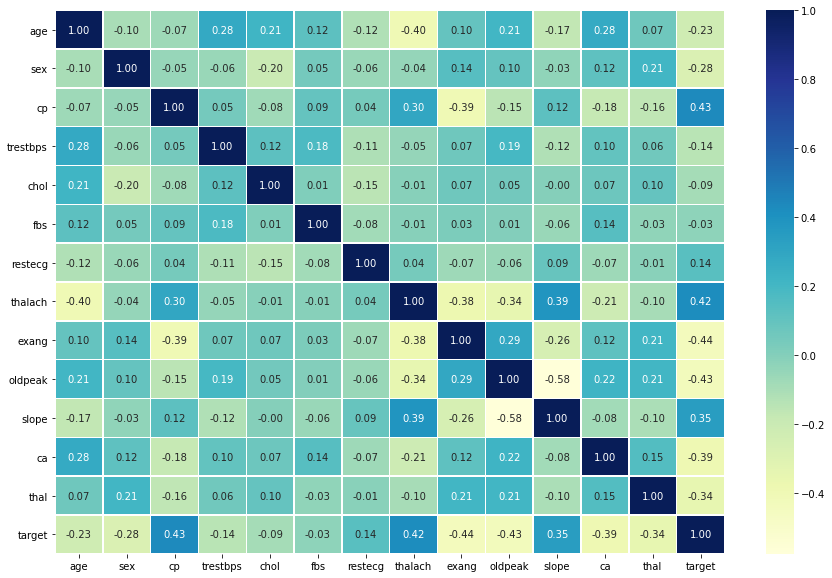

In [18]:
# Let's make out corr matrix a little prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt = ".2f",
                cmap = 'YlGnBu');

## Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split the data into X and y
X = df.drop('target' , axis =1 )
y = df['target']

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Spliting the data into train and test
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# Shape of each
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Choosing the machine learning model

* RandomForestClassifier
* Knearstmeighbours
* RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
# Put models in a dictionary
models = {'Logitic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()   }

# Create a function to fit and score models
def fit_and_score(models , X_train , X_test , y_train , y_test):
    '''
    Fits and evaluated given machine learning models.
    Models : a dict of different sci-kit learn machine learning models
    X_train : Training data (no labels)
    X_test : Testing data (No labels)
    y_train : training data
    y_test : test labels
    '''
    np.random.seed(42)
    
    #Make a dictionary to model scores
    model_scores = {}
    
    # loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(X_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test , y_test)
    return model_scores

In [27]:
model_score = fit_and_score(models , X_train , X_test , y_train , y_test)
model_score

I:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logitic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

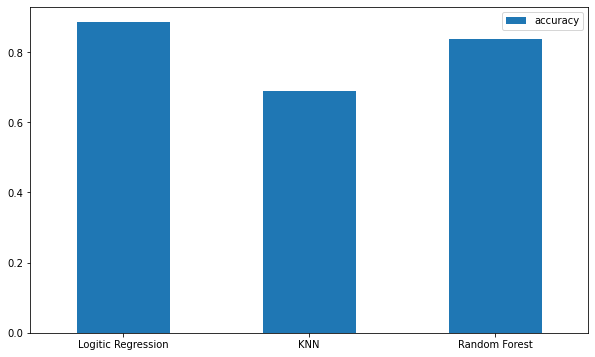

In [28]:
model_compare = pd.DataFrame(model_score , index=['accuracy'])
model_compare.T.plot.bar(rot = 0 , figsize = (10,6));

Now we've got a baseline model, The first prediction aren't always the one we should have our hopes on

## Lets look at what we have got

* Hyperparameter tuning 
* Feature inmportance 
* confusion matrix
* cross validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* Area under the curve (AUC)

# Hyperparameter tuning 

In [29]:
train_score = []
test_score = []

# Create a list of different values for n_neighbours
neighbors = range(1,21)

# Set up knn 
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # fit the algorithm
    knn.fit(X_train , y_train)
    
    #Update the training scores list
    train_score.append(knn.score(X_train ,y_train))
    
    # Update the test score list
    test_score.append(knn.score(X_test , y_test))
    
    

In [30]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


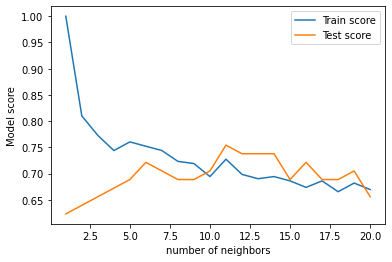

In [32]:
plt.plot(neighbors , train_score , label = "Train score")
plt.plot(neighbors , test_score , label = "Test score")

plt.xlabel("number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_score)*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV

In [33]:
## Create a hyperparameter grid for logistic regression

log_reg_grid = {"C" : np.logspace( -4 , 4,20),
               "solver" : ['liblinear']}

# Create a hyperparameter grid for randomisedforestclassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth" : [None ,3 , 5 ,10 ],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models , let's tune them
using RandomizedSearchCV

In [34]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisiticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter = 20,
                                verbose = True)

# Fit hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test , y_test)

0.8852459016393442

# # Now we tune RandomForestClassifier

In [37]:
np.random.seed(42)

#set up random hyperparameter search cv

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter = 20,
                          verbose = True)

# Fit hyperparameter search model for RFC
rs_rf.fit(X_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# Evaluate thr Randomized search forest classifirer model
rs_rf.score(X_test , y_test)

0.8688524590163934

# GridSearchCV

## Tuning the Linear Regression model using GridSearchCV

In [40]:
# Different different Hyperparameter grid

log_reg_grid = {"C" : np.logspace(-4,4,30),
             "solver" : ['liblinear']}

# Set up grid for Logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# fit out grid hyperparameter
gs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [41]:
#checking the best hypreparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test , y_test)

0.8852459016393442

# Evaluating out tuned machine learining classifier , beyond accuracy
* Roc Curve and AUC curve
* Confusion matrix
* Classificatiion Report
* Precision
* Recal
* F1 Score

In [43]:
# Make prediciton with tuned model
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [45]:
from sklearn.metrics import roc_curve

In [46]:
y_preds_proba = gs_log_reg.predict_proba(X_test)
y_preds_proba

array([[0.86725274, 0.13274726],
       [0.24408505, 0.75591495],
       [0.18547578, 0.81452422],
       [0.94530777, 0.05469223],
       [0.11546644, 0.88453356],
       [0.12929703, 0.87070297],
       [0.39487822, 0.60512178],
       [0.99564019, 0.00435981],
       [0.98623623, 0.01376377],
       [0.43861542, 0.56138458],
       [0.28279198, 0.71720802],
       [0.88095856, 0.11904144],
       [0.11269899, 0.88730101],
       [0.93994962, 0.06005038],
       [0.0324994 , 0.9675006 ],
       [0.06818877, 0.93181123],
       [0.03595298, 0.96404702],
       [0.90547239, 0.09452761],
       [0.98230236, 0.01769764],
       [0.97353638, 0.02646362],
       [0.28456862, 0.71543138],
       [0.97272398, 0.02727602],
       [0.85725328, 0.14274672],
       [0.283392  , 0.716608  ],
       [0.11801722, 0.88198278],
       [0.30519409, 0.69480591],
       [0.15765768, 0.84234232],
       [0.30664443, 0.69335557],
       [0.98169062, 0.01830938],
       [0.1221763 , 0.8778237 ],
       [0.

In [47]:
y_preds_positive = y_preds_proba[: , 1]
y_preds_positive

array([0.13274726, 0.75591495, 0.81452422, 0.05469223, 0.88453356,
       0.87070297, 0.60512178, 0.00435981, 0.01376377, 0.56138458,
       0.71720802, 0.11904144, 0.88730101, 0.06005038, 0.9675006 ,
       0.93181123, 0.96404702, 0.09452761, 0.01769764, 0.02646362,
       0.71543138, 0.02727602, 0.14274672, 0.716608  , 0.88198278,
       0.69480591, 0.84234232, 0.69335557, 0.01830938, 0.8778237 ,
       0.0715076 , 0.06684154, 0.01510285, 0.14314492, 0.6022949 ,
       0.12640329, 0.6633502 , 0.85079082, 0.81898324, 0.84121546,
       0.54515819, 0.79250828, 0.7781759 , 0.70538843, 0.83243213,
       0.02112999, 0.73216372, 0.93234387, 0.10276675, 0.06440751,
       0.1347065 , 0.03554557, 0.8044197 , 0.95312793, 0.31714638,
       0.00309601, 0.0873472 , 0.93823574, 0.028138  , 0.01309874,
       0.06291751])

In [48]:
fpr , tpr , threshold = roc_curve( y_test , y_preds_positive )

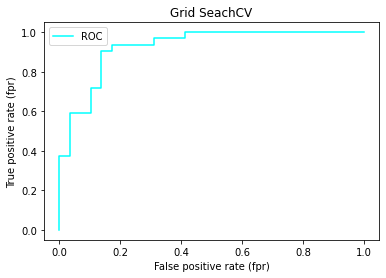

In [49]:
def plot_roc_curve(fpr , tpr):
    """
    Plots a roc curve given the flase positive rate (fpr) 
    and true positive rates (tpr) of a model
    """
    plt.plot(fpr, tpr , color = 'cyan' , label = "ROC")
    # plot line with no predictive power (baseline)
    
    #plt.plot([0,1] , [0,1] , color = 'darkblue' , linestyle = "--" , label = "Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (fpr)")
    plt.title("Grid SeachCV")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr , tpr)

In [50]:
# confusion matrix 
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


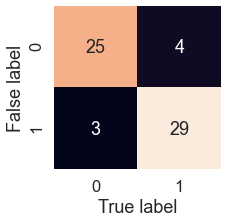

In [51]:
sns.set(font_scale= 1.5)

def plot_conf_mat(y_test , y_preds):
    '''
    Plotting heatmap
    '''
    
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel('False label')
    
plot_conf_mat(y_test , y_preds)
    

In [52]:
# classification report
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# calculate evaluation matrix using cross validation ,recall and f1-score of our model

In [53]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                        solver='liblinear')

In [55]:
# cross-validated accuracy
cv_acc = cross_val_score(clf , X , y ,cv=5, scoring = 'accuracy')
cv_acc
np.mean(cv_acc)

0.8446994535519124

In [56]:
# cross validated precision
cv_precision = cross_val_score(clf , X , y ,cv=5, scoring = 'precision')
np.mean(cv_precision)

0.8207936507936507

In [57]:
# cross validation recall
cv_recall = cross_val_score(clf , X , y ,cv=5, scoring = 'recall')
np.mean(cv_recall)

0.9212121212121213

In [58]:
cv_f1 = cross_val_score(clf , X , y ,cv=5, scoring = 'f1')
np.mean(cv_f1)

0.8673007976269721

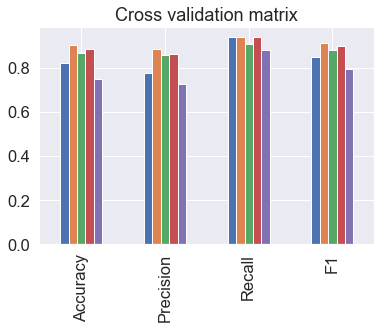

In [59]:
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                          'Precision' : cv_precision,
                          'Recall' : cv_recall,
                          'F1' : cv_f1} )

cv_metrics.T.plot.bar(title = "Cross validation matrix" , legend = False
                     );

feature_importance is another way of asking " which feature contributed most
to the outcomes of the model and how did they contribute"

# Finding feature importance is different for each machine learning model

In [60]:
# fit an instance of Logistic regression

gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418, solver='liblinear')

In [61]:
clf.fit(X_train , y_train);

In [62]:
# Check ceoff 
# Mapping each column to a coefficient variable

clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [63]:
feature_dict = dict(zip(df.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

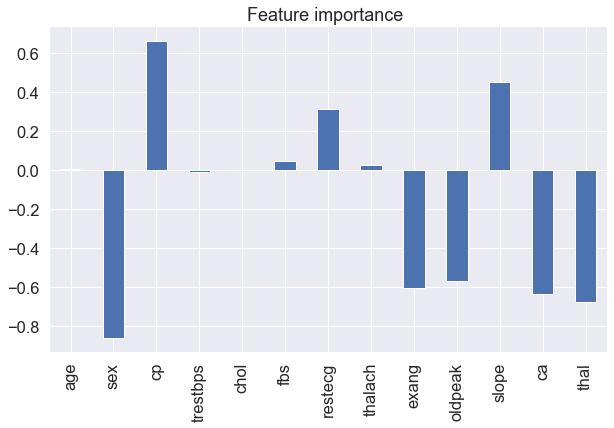

In [64]:
feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df.T.plot.bar(figsize = (10,6) ,title = 'Feature importance ' , legend = False )

In [77]:
import pickle as pkl
model = 'heart-disease-classification-model.sav'
pkl.dump(gs_log_reg , open(filename , 'wb'))

NameError: name 'filename' is not defined